# Sprint 機械学習スクラッチ SVM
分類のためのサポートベクターマシン（SVM、サポートベクトルマシン）のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


SVMには学習時に分類の間違いを認めるソフトマージンSVMと、認めないハードマージンSVMがありますが、ここでは実装が単純なハードマージンSVMを扱います。


以下に雛形を用意してあります。このScratchSVMClassifierクラスにコードを書き加えていってください。

### 雛形

In [1]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル

    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        pass
        return

## 【問題1】ラグランジュの未定乗数法による最急降下

SVMの学習は、ラグランジュの未定乗数法を用います。サンプル数分のラグランジュ乗数 
λ
 を用意して、以下の式により更新していきます。この計算を行うメソッドをScratchSVMClassifierクラスに実装してください。


$
\lambda_i^{new} = \lambda_i + \alpha(1 - \sum_{j=1}^{n}{\lambda_j y_i y_j k(x_i, x_j)})
$

In [ ]:
def gradient_descent(X, y, lmd_in):
    lr = 0.002
    lmd_ans = lmd_in + lr*(1 - y * np.sum(lmd_in * y * np.dot(X, X.T), axis=1))
    lmd_ans = np.where(lmd_ans < 0, 0, lmd_ans)
    return lmd_ans

## 【問題2】サポートベクターの決定
計算したラグランジュ乗数 
λ
 が設定した閾値より大きいサンプルをサポートベクターとして扱います。推定時にサポートベクターが必要になります。サポートベクターを決定し、インスタンス変数として保持しておくコードを書いてください。


閾値はハイパーパラメータですが、1e-5程度からはじめると良いでしょう。サポートベクターの数を出力させられるようにしておくと学習がうまく行えているかを確認できます。

In [ ]:
threshold = 1e-5
lmd_ = np.where(lmd_ < threshold, 0, lmd_)
lmd_ = np.ravel(lmd_)

n_support_vectors = np.count_nonzero(lmd_ > 0)
index_support_vectors = np.nonzero(lmd_ )

for i in index_support_vectors:
    lam_sv = np.array(lmd_[i])
    X_sv = np.array(X[i,:])
    y_sv = np.array(y[0][i])

## 【問題3】推定
推定時には、推定したいデータの特徴量とサポートベクターの特徴量をカーネル関数によって計算します。求めた 
f
(
x
)
 の符号が分類結果です。

$
f(x) = \sum_{n=1}^{N}\lambda_n y_{sv\_n} k(x, s_n)
$

In [ ]:
def predict(X):
    judge = np.sum(lam_sv*y_sv*np.dot(X,X_sv.T), axis=1)
    judge = np.where(judge<0,-1,judge)
    judge = np.where(judge>=0,1,judge).astype("int8")
    return judge

### 問題1〜3を反映したコード

In [22]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル
    """
    def __init__(self, num_iter, lr, threshold=0.01):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.threshold = threshold
        self.lmd_ = np.array([])

    def _kernel(self,X1,X2, gamma=1,theta=0, d=1):
        kernel = gamma * (np.dot(X1, X2.T)+theta)**d
        return kernel
        
    def _gradient_descent(self, X, y):
        lmd_ans = self.lmd_ + self.lr*(1 - y * np.sum(self.lmd_ * y * self._kernel(X,X), axis=1))
        lmd_ans = np.where(lmd_ans < 0, 0, lmd_ans)
        return lmd_ans
           
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証用データが入力された場合はそれに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """        
        # lmd_の初期設定
        self.lmd_ = np.random.rand(1,len(X))*0.00001
        # yのreshape
        y = y.reshape(1,-1)
                
        for i in range(self.iter):
            self.lmd_ = self._gradient_descent(X,y)

        self.lmd_ = np.where(self.lmd_ < self.threshold, 0, self.lmd_)
        self.lmd_ = np.ravel(self.lmd_)
        self.n_support_vectors = np.count_nonzero(self.lmd_ > 0)
        self.index_support_vectors = np.nonzero(self.lmd_ )

        for i in self.index_support_vectors:
             self.lam_sv = np.array(self.lmd_[i])
             self.X_sv = np.array(X[i,:])
             self.y_sv = np.array(y[0][i])
        
        # print(self.n_support_vectors)
        

    def predict(self, X):
        """
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
            
        judge = np.sum(self.lam_sv*self.y_sv* self._kernel(X, self.X_sv), axis=1)
        judge = np.where(judge<0,-1,judge)
        judge = np.where(judge>=0,1,judge).astype("int8")
        return judge

## 【問題4】学習と推定
機械学習スクラッチ入門のSprintで用意したシンプルデータセット1の2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [23]:
import numpy as np
import math
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# 評価指標の関数
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def evalate(y_test, y_pred):
    print("accuracy =", accuracy_score(y_test, y_pred))
    print("precision =", precision_score(y_test, y_pred, average='macro'))
    print("recall =", recall_score(y_test, y_pred, average='macro'))
    print("f1 =", f1_score(y_test, y_pred, average='macro'))

In [25]:
#シンプルデータセット1
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), 
                                        np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

#データを分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [32]:
##スクラッチによる推定
clf = ScratchSVMClassifier(2000, 0.002, 0.0001)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
evalate(y_test, y_pred)

accuracy = 1.0
precision = 1.0
recall = 1.0
f1 = 1.0


In [46]:
##scilit-learnによる推定
from sklearn.svm import SVC
clf_sk = SVC( kernel='linear')
clf_sk.fit(X_train,y_train)
pred_sk = clf_sk.predict(X_test)
evalate(y_test, pred_sk)

accuracy = 1.0
precision = 1.0
recall = 1.0
f1 = 1.0


## 【問題5】決定領域の可視化
決定領域を可視化してください。



In [34]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

In [70]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='f0', ylabel='f1',
                   target_names=['0', '1']):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2    
      
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    
    plt.scatter(model.X_sv[:,0], model.X_sv[:,1], s=80, color="yellow", marker= "o", label = "support vector")

    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

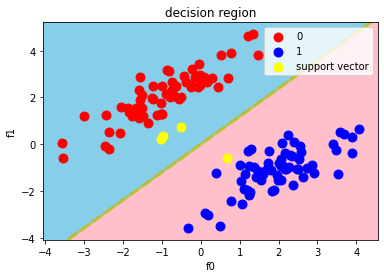

In [71]:
decision_region(X_test, pred, clf)